In [13]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

def gradient_descent(f,x0,eta,epsilon):
  x = sp.symbols("x")
  df = sp.lambdify(x,sp.diff(f(x),x)) # la dérivée de f (fonctionne si f n'est pas trop compliquée)
  result = x0
  while df(result)>epsilon:
    result = result - eta*df(result)
  return result

In [20]:
def g(x):
  return x**2 -x+1

def f(x):
  return 0.01*(x**4+2*x**3-12*x**2-2*x+6)

def carre(x):
  return x**2

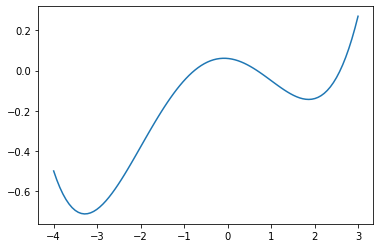

In [32]:
x = np.linspace(-4, 3, 100)
y = f(x)
plt.plot(x, y)
plt.show()

In [30]:
gradient_descent(g, 10, 0.01, 0.01)

0.5049690791479365

In [18]:
gradient_descent(f, 10, 0.01, 0.01)

1.8881103204483922

In [27]:
gradient_descent(f, -4, 0.2, 0.1)

-4

4/ on part du côté de l'autre minimum: on finit dans un autre puit

In [33]:
gradient_descent(carre, 10, 10, 0.01)

-190

5/ si on prend un eta trop grand et un epsilon petit, on va sauter d'un cote à l'autre du puit sans jamais atteindre le fond 

In [34]:
from torchvision import datasets

training_data = datasets.FashionMNIST(".",download=True,train=True)
test_data = datasets.FashionMNIST(".",download=True,train=False)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



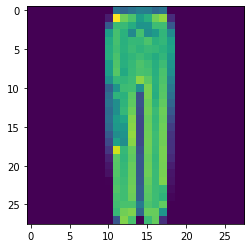

In [41]:
plt.imshow(training_data[1000][0])


In [42]:
test_data = [(np.ndarray.flatten(np.array(img))/255,cat) for img,cat in test_data]
training_data = [(np.ndarray.flatten(np.array(img))/255,cat) for img,cat in training_data]
np.random.shuffle(training_data) # on mélange les données d'entraînement qui étaient classées


In [56]:
len(training_data)
training_data[7][1]

5

In [67]:
def propagate(w, b, training_data):
  cout = 0
  gradb = 0
  gradw = np.zeros(len(w))
  n = len(training_data)
  for x in training_data:
    facteur = x[1] - np.dot(w, x[0]) - b
    cout += facteur**2
    gradb += facteur
  for k in range(len(w)):
    valeur = 0
    for x in training_data:
      valeur += x[1] - x[0][k] - b
    gradw[k]= -2/n * valeur
  cout = 1/n * cout
  gradb = -2/n * gradb
  return cout, gradw, gradb




In [68]:
def optimize_gd(w,b,training_data,rate=5e-3,maxiter=30,info=10):
  compteur = 0
  costs = np.zeros(maxiter)
  while compteur<=maxiter:
    cout, gradw, gradb = propagate(w, b, training_data)
    b -= rate*gradb
    for j in range(len(w)):
      w[j] -= rate*gradw[j]
    costs[compteur] = cout
    if compteur%info==0:
      print(cout)
    compteur += 1
  return w, b, costs
  




In [69]:
def test_params(w,b,test_data):
  correct = 0
  for k in range(1000):
    y_predict = np.dot(w, test_data[0]) + b
    if np.abs(y_predict - test_data[1]) <= 0.5:
      correct +=1
    return correct/1000

In [70]:
def optimize_sgd(w,b,training_data,rate=5e-4,maxiter=2,info=1):
  costs = np.zeros(maxiter*len(training_data))
  compteur = 0
  while compteur <= maxiter*len(training_data):
    facteur = (training_data[compteur][1] - np.dot(w, training_data[compteur][0]) - b)
    b -= rate*(-2)*facteur
    costs[compteur]= facteur**2
    for k in range(len(w)):
      facteur_w = training_data[compteur][1] - training_data[compteur][0][k] - b
      gradw[k]= -2 * facteur_w
    compteur += 1
    compteur = compteur//len(training_data)
    if compteur%info==0:
      print(facteur**2)
  return w, b, costs

Q10 raisonnement similaire 

In [71]:
def optimize_sgd_moment(w,b,training_data,rate=1e-3,mu=0.95,maxiter=2,info=1):
  v_b = 0
  v_w = np.zeros(len(w))
  costs = np.zeros(maxiter*len(training_data))
  compteur = 0
  compteur_tot = 0
  while compteur_tot <= maxiter:
    facteur = (training_data[compteur][1] - np.dot(w, training_data[compteur][0]) - b)
    v = mu*v - rate*(-2)*facteur
    b += v
    costs[compteur]= facteur**2
    for k in range(len(w)):
      facteur_w = training_data[compteur][1] - training_data[compteur][0][k] - b
      v_w[k]= mu*v_w[k] -rate*(-2) * facteur_w
      w[k] += v_w[k]
    compteur += 1
    compteur = compteur//len(training_data)
    if compteur//len(training_data)==0:
      compteur_tot+=1
    if compteur%info==0:
      print(facteur**2)
  return w, b, costs


Q 12 raisonnement similaire

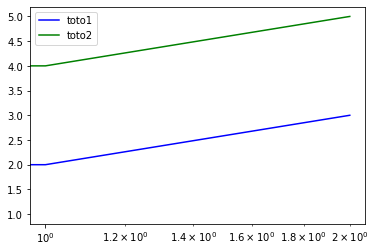

In [72]:
def graph(**kwargs):
	colors = "bgrcmykw:"
	fig, ax = plt.subplots()

	for name,color in zip(kwargs,colors):
		ax.semilogx(kwargs[name],color,label=name)
	ax.legend()
	plt.show()

# exemple d'utilisation
graph(toto1=[1,2,3],toto2=[3,4,5])
# le label de [1,2,3] est "toto1"

Pour tester : prendre des valeurs données par une distribution gaussienne N(0,1)

In [73]:
from random import gauss
b = gauss(0, 1)
w = np.zeros(len(test_data[0][0]))
for k in range(len(w)):
  w[k] = gauss(0,1)

graph(méthode_1 = [optimize_gd(w, b, training_data)[2]], méthode_2 = [optimize_sgd(w, b, training_data)[2]], méthode_3 = [optimize_sgd_moment(w, b, training_data)[2]] )

70.20845461579097
209.9842489913893
483.44579881455286
901.5634393624267
1487.5505739427838
2278.1246509756475
3325.8852258332786
4702.948568904809
6506.080869078969
8863.689599369289


KeyboardInterrupt: ignored